In [1]:
import numpy as np
from scipy import stats

### Предполоагаем что закон распределения наблюдений произвольный

        The Mann-Whitney U test is a non-parametric version of the t-test for independent samples. 
        When the means of samples from the populations are normally distributed, consider scipy.stats.ttest_ind.

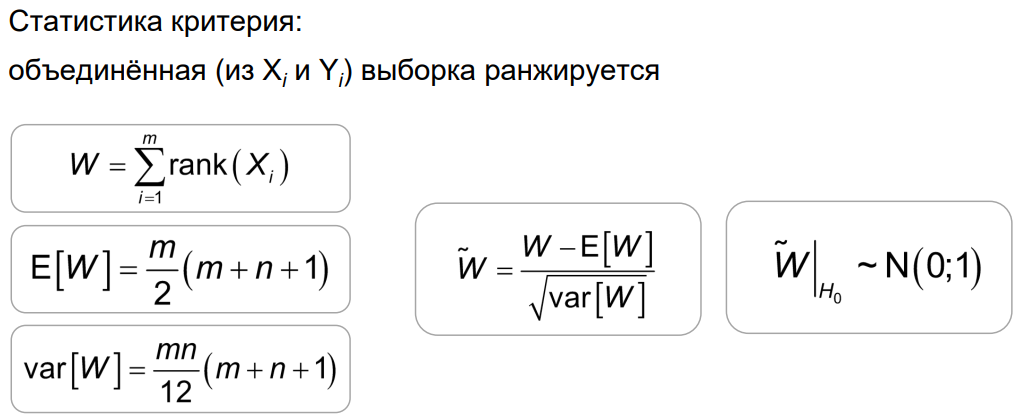

In [18]:
# исходные данные

x = np.array([30,28,46,42,35,33,44,43,31,38])
y = np.array([26,38,39,28,30,27,32,35])

In [19]:
# руками

m = len(x)
n = len(y)

xy = np.hstack((x, y))  # == np.concatenate((x, y), axis=0)
r = stats.rankdata(xy)
print(xy)
print(r)

ww = r[:m]
W = sum(ww)

ew = m*(m + n + 1)/2  # мат. ожидание 
varw = m*n*(m + n + 1)/12 # дисперсия

WT = (W - ew)/varw**0.5  #  стандартизированная статистика
P = 1 - stats.norm.cdf(WT)   # правостороння альтернатива   HA : μX > μY

print('Statistic: ', WT, ', p_value: ', P)

[30 28 46 42 35 33 44 43 31 38 26 38 39 28 30 27 32 35]
[ 5.5  3.5 18.  15.  10.5  9.  17.  16.   7.  12.5  1.  12.5 14.   3.5
  5.5  2.   8.  10.5]
Statistic:  1.6881943016134133 p_value:  0.0456869683682225


        значит Н0 гипотезу о том, что среднbе значение для x и y равны отвергаем в пользу гипотезы HA : μX > μY, 
        что mean(x) > mean(y)
        НО отвергаем очень неуверенно, т.к. значение p_value очень близко к уровню значимости 0.05
        НАДО больше наблюдений для более уверенного вывода

In [32]:
stats.mannwhitneyu(x, y)  # two-sided

MannwhitneyuResult(statistic=59.0, pvalue=0.09952282344898289)

In [33]:
# scipy

stats.mannwhitneyu(x, y, alternative='greater')   

MannwhitneyuResult(statistic=59.0, pvalue=0.049761411724491444)

In [34]:
0.09952282344898289 / 2

0.049761411724491444